# Seaborn and MatPlotLib Styling for ACM & IEEE latex publications

In [1]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Initialize style
plt.style.use("acm_ieee_latex_pubstyle.txt")

SINGLE_COLUMN = SINGLE_WIDTH = 8.0
DOUBLE_COLUMN = DOUBLE_WIDTH = 16.0

def width_height(width=SINGLE_COLUMN, height=None, columns=1, rows=1):
    """Width driven sizing for seaborn multi-grid layouts
    
    Derive height & aspect kwargs for facetgrid, pairgrid & friends with a target sizing
    in terms of width and height.  Convenient for creating figures that has
    to be fit into a certain width, while maintaining the correct aspect ratios of the fonts.
    Call this function to derive the height & aspect
    
    Currently, ACM & IEEE latex, single column figure defaults to a width of 8inch
    and the double column figure defaults to a width of 8 inch for the correct text scaling
    
    Usage:
    - sns.FacetGrid( ... , **width_height())
    - sns.PairGrid( ..., **width_height(columns=X, rows=Y))

    :param width: target width in inches (4 inch for a single column figure is default)
    :param height: target heigth in inches (width * 3/4 - golden ratio is the default)
    :param columns: target # of columns for facetgrid
    :param rows: target # of rows for facetgrid
    """
    if height is None:
        height = width * 3/4
    ratio = float(width) / (float(height) / float(rows))
    return {"height": (float(width) / ratio), "aspect": ratio / float(columns)}

**Dummy Data and Default Parameters**

In [2]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**Example Plots**

# FacetGrid single column example

Setting width to SINGLE_COLUMN will give you a full width graph.

/Users/vo0/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:133: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  leg = ax.legend(handles, labels, **kwargs)


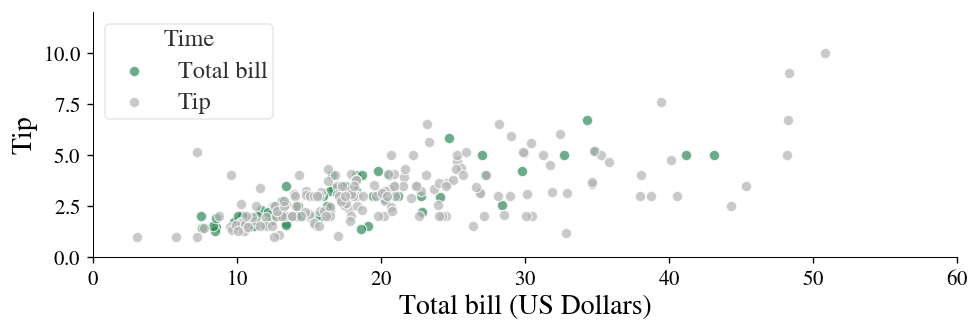

In [3]:
# Read default style and do some local adjustments
#plt.rcParams["legend.markerscale"] = 2.0

# Plot
pal = dict(Lunch="seagreen", Dinner=".7")
g = sns.FacetGrid(tips, hue="time", palette=pal, legend_out=False, **width_height(height=3))
g.map(sns.scatterplot, "total_bill", "tip", alpha=0.7)
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.add_legend(title="Time", labels=["Total bill", "Tip"])
g.savefig('example_1.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

# Facetgrid multi-column & multi-row example

Get help from "width_height" function to get the right "height" & "aspect" numbers.

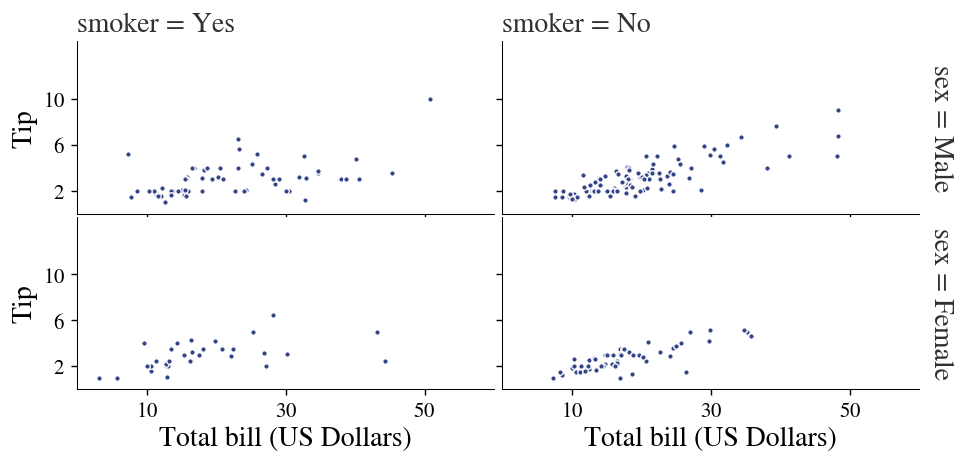

In [4]:
g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True,
                  **width_height(width=SINGLE_COLUMN, height=4, columns=2, rows=2))
g.map(sns.scatterplot, "total_bill", "tip", color="#334488", s=10)
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=.02, hspace=.02)
g.savefig('example_2.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

# Facetgrid double width multi-column & multi-row example

Get help from "width_height" function to get the right "height" & "aspect" numbers.
Setting width to DOUBLE_COLUMN will give you a full width graph.

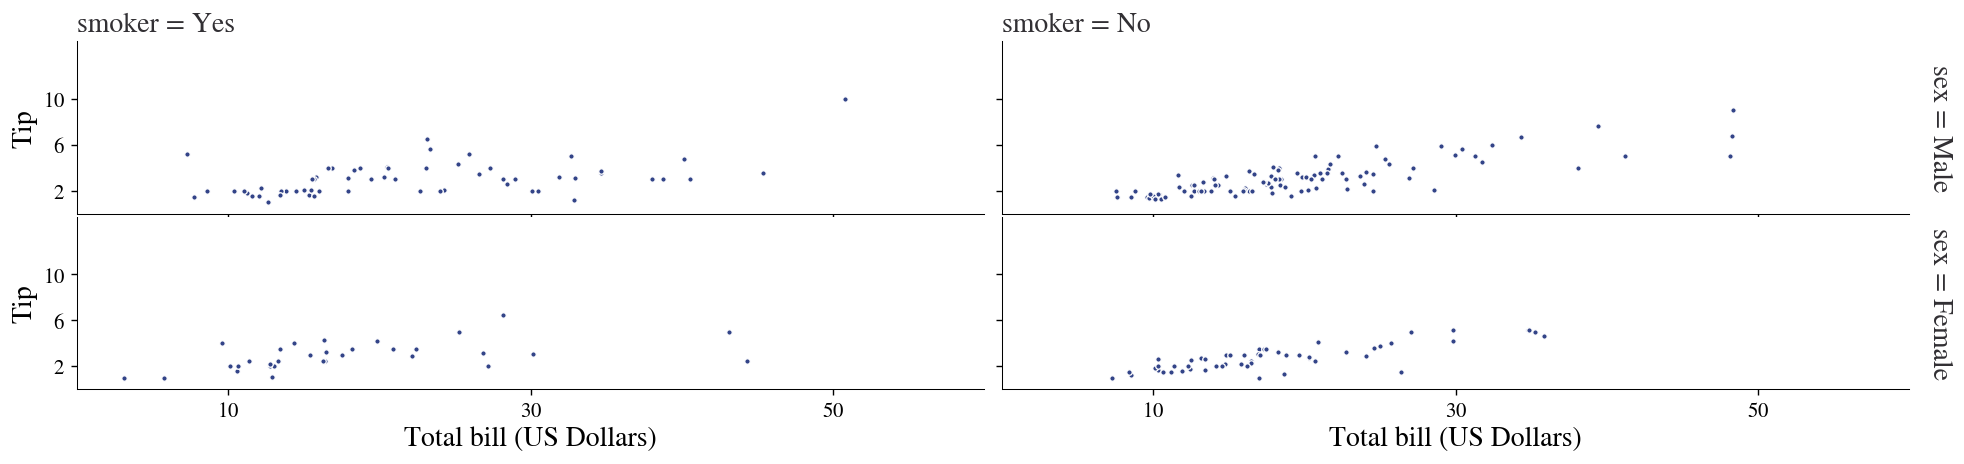

In [5]:
g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True,
                  **width_height(width=DOUBLE_COLUMN, height=4, columns=2, rows=2))
g.map(sns.scatterplot, "total_bill", "tip", color="#334488", s=10)
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=.02, hspace=.02)
g.savefig('example_3.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

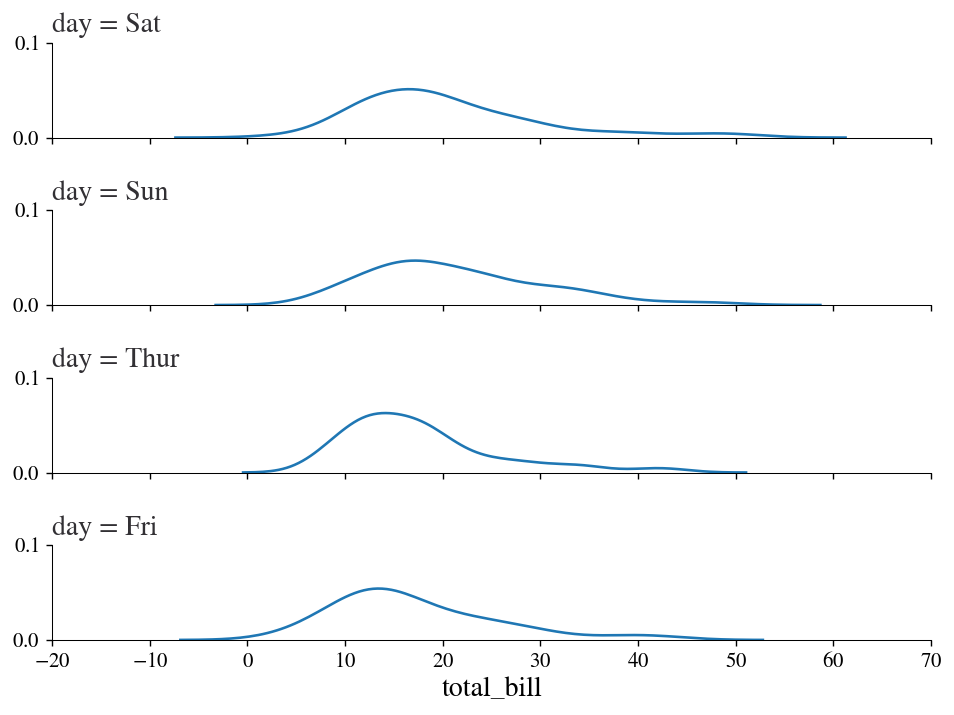

In [6]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days, **width_height(rows=4))
g.map(sns.kdeplot, "total_bill")
g.savefig('example_4.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

AttributeError: 'AxesSubplot' object has no attribute 'axline'

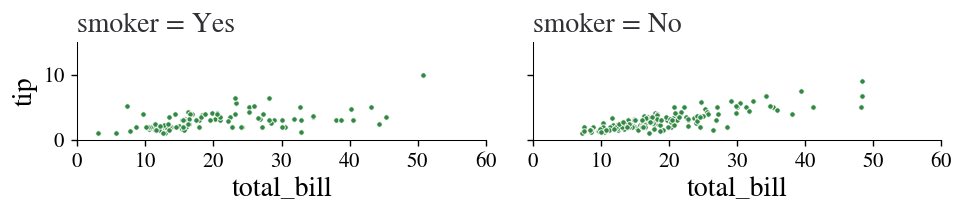

In [7]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, **width_height(width=SINGLE_COLUMN, height=2, columns=2))
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=10, lw=0.5)
for ax in g.axes.flat:
    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.set(xlim=(0, 60), ylim=(0, 14))
g.savefig('example_5.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

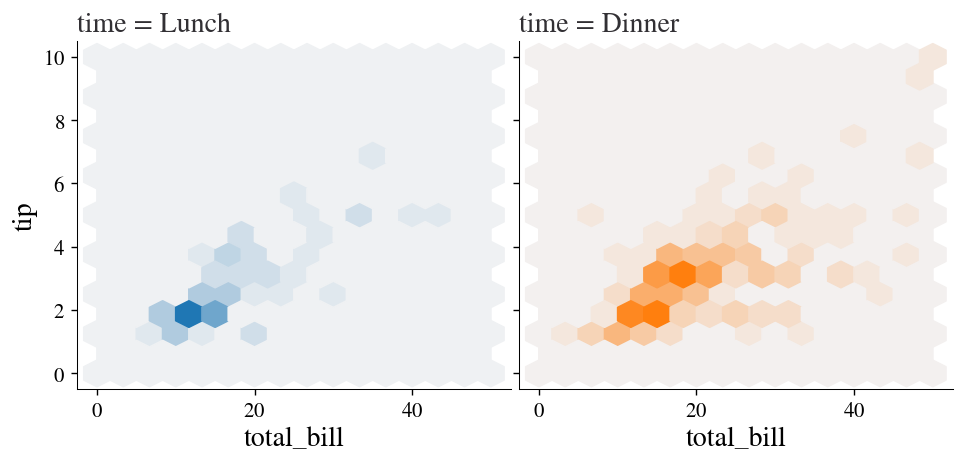

In [72]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

g = sns.FacetGrid(tips, hue="time", col="time", **width_height(width=SINGLE_COLUMN, height=4, columns=2))
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02)
g.savefig('example_6.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

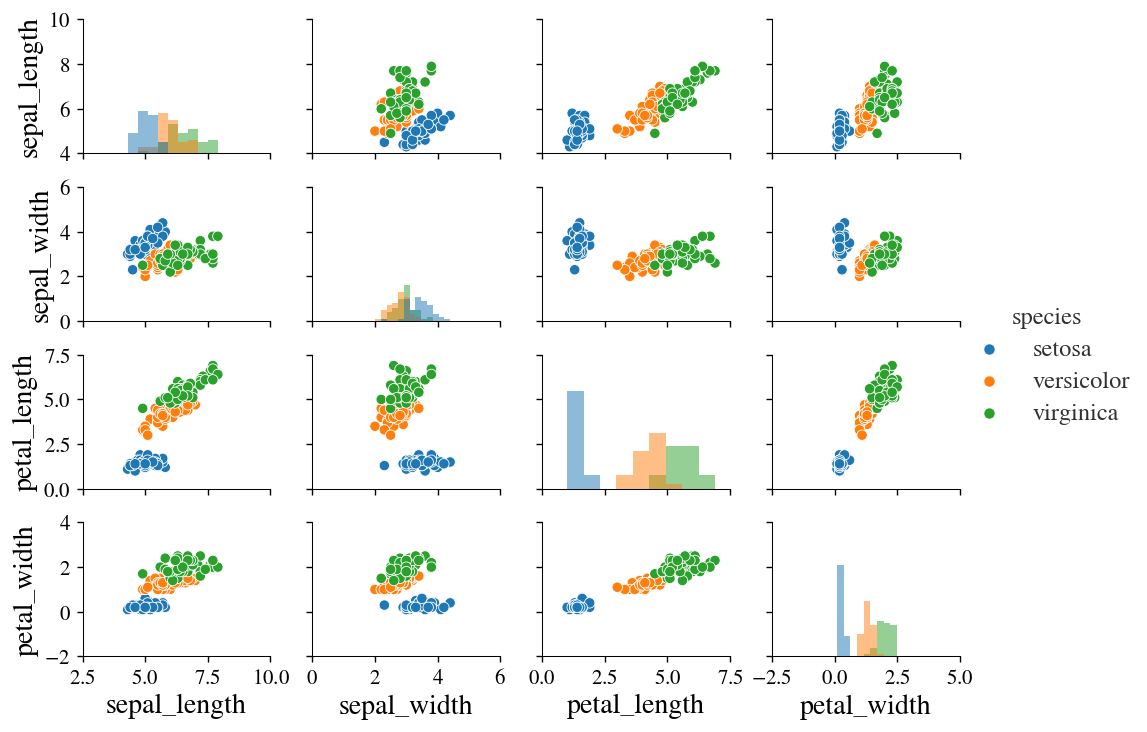

In [73]:
g = sns.PairGrid(iris, hue="species", **width_height(columns=4, rows=4))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
g.savefig('example_7.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

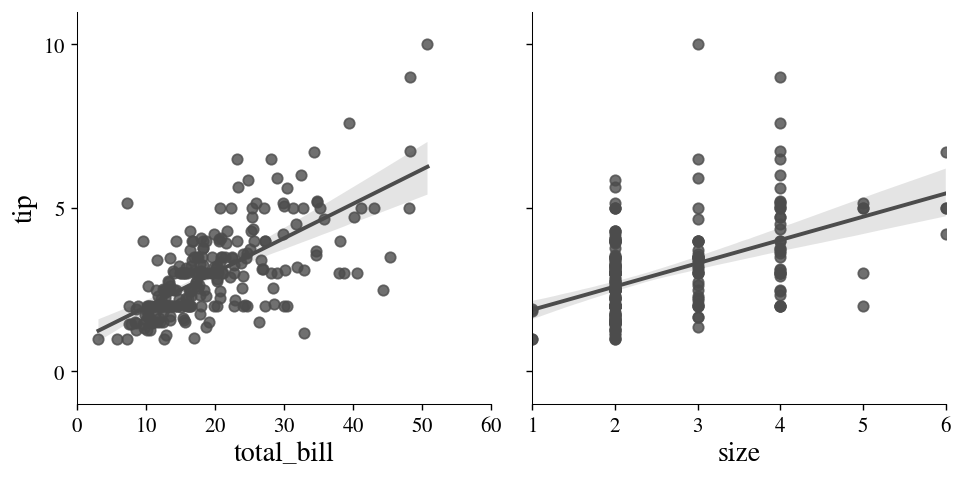

In [74]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"],
                 **width_height(height=4, columns=2))
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])
g.savefig('example_8.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

# Gridspec driven layout

In [80]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


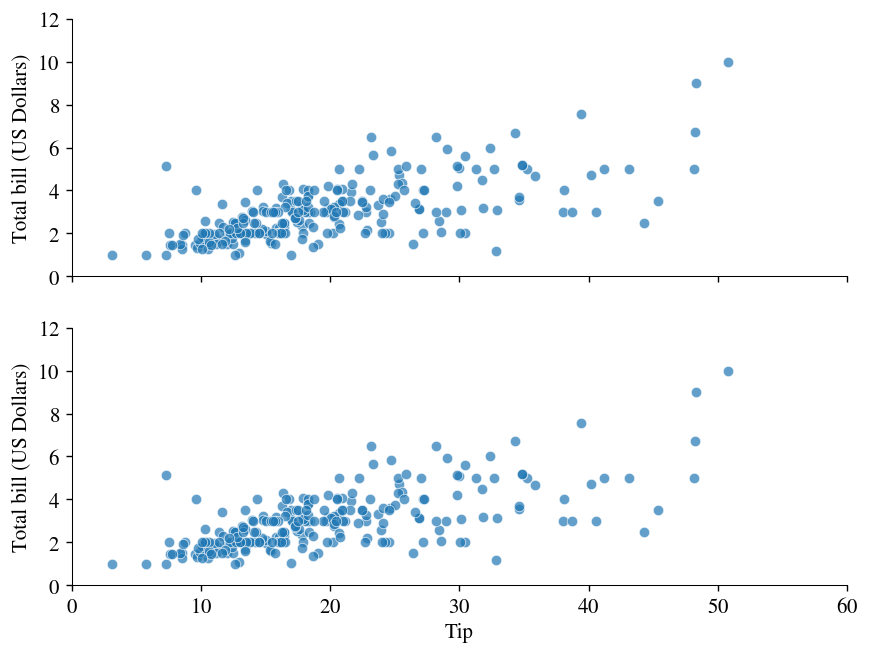

In [88]:
plt.close()

# Override acm-ieee-latex-pubstyle
# Current figure default width for a single column figure is 8 inches
# Style file fonts are scaled 2x (20 point translates to 10 points in the resulting artifact)
plt.figure(figsize=(8,6))
sns.despine(top=False, right=False)
sns.set_context(rc = {'patch.linewidth': 0.0, 'axes.labelsize': 12})

# Layout
gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 
gs.update(hspace=0.2)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=True)

sns.scatterplot(data=tips, x="total_bill", y="tip", alpha=0.7, ax=ax0)
ax0.set_ylabel("Total bill (US Dollars)")
ax0.set_xlabel("Tip")

sns.scatterplot(data=tips, x="total_bill", y="tip", alpha=0.7, ax=ax1)
ax1.set_ylabel("Total bill (US Dollars)")
ax1.set_xlabel("Tip")

plt.subplots_adjust(hspace=.0)
#plt.savefig("power_energy_overview.pdf", format="pdf", bbox_inches='tight', pad_inches=0.01)
plt.show()